In [1]:
import warnings 
warnings.filterwarnings("ignore")

In [2]:
# Import essential packages

import cv2    
import math   
import matplotlib.pyplot as plt    
import pandas as pd
from keras.preprocessing import image   
import numpy as np    
from keras.utils import np_utils
from skimage.transform import resize   

###  Read the video, extract frames from it and save them as images

In [6]:


VideoCap = cv2.VideoCapture("Tom and jerry.mp4")
count = 0
n = 0
fps = VideoCap.get(cv2.CAP_PROP_FPS)
while True:
    success, image = VideoCap.read()
    if success == False:
        break
    if (1*n)%math.floor(fps)==0:           
        filename ="Training_Images/frame"+str(count)+".jpg"
        cv2.imwrite(filename, image)
        count += 1
    n += 1
VideoCap.release()
print('Done')

Done


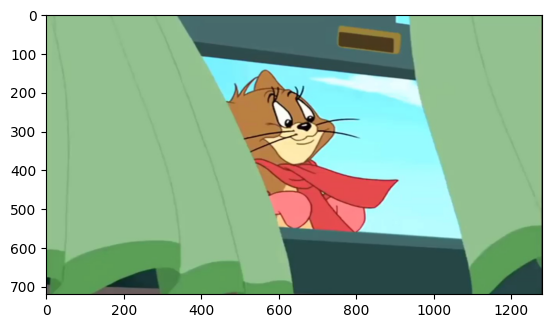

In [7]:
img = plt.imread('Training_Images/frame0.jpg')   
plt.imshow(img)

### Label a few images for training the model

In [41]:
data = pd.read_csv("mapping.csv")    
data.head()      

,Image_ID,Class
0,frame0.jpg,1
1,frame1.jpg,1
2,frame2.jpg,2
3,frame3.jpg,2
4,frame4.jpg,2


In [10]:
X = [ ]     # creating an empty array
for img_name in data.Image_ID:
    img = plt.imread('Training_Images/'+img_name)
    X.append(img)  # storing each image in array X
X = np.array(X)    # converting list to array

In [11]:
y = data['Class']
dummy_y = np_utils.to_categorical(y)    # one hot encoding Classes

In [12]:
y.value_counts()

Class
2    120
0    111
1     67
Name: count, dtype: int64

In [13]:
image = []
for i in range(0,X.shape[0]):
    a = resize(X[i], preserve_range=True, output_shape=(224,224)).astype(int)      
    image.append(a)
X = np.array(image) 

In [14]:
from tensorflow.keras.applications.imagenet_utils import preprocess_input
X = preprocess_input(X, data_format=None, mode='tf')

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, dummy_y, test_size=0.3, random_state=42)    # preparing the validation set

### Building the model

In [16]:
from keras.models import Sequential
from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import VGG16, InceptionV3
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten,Dense,InputLayer,Dropout

In [17]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))   

In [18]:
X_train = base_model.predict(X_train)
X_valid = base_model.predict(X_valid)
X_train.shape, X_valid.shape

3/3 [==============================] - 9s 3s/step


((208, 7, 7, 512), (90, 7, 7, 512))

In [20]:
X_train = X_train.reshape(208, 7*7*512)      # converting to 1-D
X_valid = X_valid.reshape(90, 7*7*512)

In [21]:
train = X_train/X_train.max()      # centering the data
X_valid = X_valid/X_train.max()

In [22]:
model = Sequential()
model.add(InputLayer((7*7*512,)))    
model.add(Dense(units=1024, activation='relu')) 
model.add(Dense(units=1024, activation='relu'))
model.add(Dense(3, activation='softmax'))   

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              25691136  
                                                                 
 dense_1 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_2 (Dense)             (None, 3)                 3075      
                                                                 
Total params: 26,743,811
Trainable params: 26,743,811
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
model.fit(train, y_train, epochs=100, validation_data=(X_valid, y_valid))

Epoch 1/100
7/7 [==============================] - 3s 410ms/step - loss: 1.1961 - accuracy: 0.5433 - val_loss: 0.7634 - val_accuracy: 0.6778
Epoch 2/100
7/7 [==============================] - 3s 375ms/step - loss: 0.4687 - accuracy: 0.8365 - val_loss: 0.6238 - val_accuracy: 0.7444
Epoch 3/100
7/7 [==============================] - 3s 375ms/step - loss: 0.2003 - accuracy: 0.9423 - val_loss: 0.4792 - val_accuracy: 0.8000
Epoch 4/100
7/7 [==============================] - 3s 359ms/step - loss: 0.1229 - accuracy: 0.9567 - val_loss: 0.5090 - val_accuracy: 0.8444
Epoch 5/100
7/7 [==============================] - 3s 393ms/step - loss: 0.0812 - accuracy: 0.9760 - val_loss: 0.7488 - val_accuracy: 0.8111
Epoch 6/100
7/7 [==============================] - 3s 431ms/step - loss: 0.0819 - accuracy: 0.9712 - val_loss: 0.5969 - val_accuracy: 0.8111
Epoch 7/100
7/7 [==============================] - 3s 380ms/step - loss: 0.0556 - accuracy: 0.9904 - val_loss: 0.4515 - val_accuracy: 0.8778
Epoch 8/100
7

Epoch 59/100
7/7 [==============================] - 2s 356ms/step - loss: 0.0068 - accuracy: 0.9952 - val_loss: 0.6416 - val_accuracy: 0.8556
Epoch 60/100
7/7 [==============================] - 2s 353ms/step - loss: 0.0069 - accuracy: 0.9952 - val_loss: 0.6455 - val_accuracy: 0.8556
Epoch 61/100
7/7 [==============================] - 3s 361ms/step - loss: 0.0069 - accuracy: 0.9952 - val_loss: 0.6483 - val_accuracy: 0.8556
Epoch 62/100
7/7 [==============================] - 2s 353ms/step - loss: 0.0070 - accuracy: 0.9904 - val_loss: 0.6574 - val_accuracy: 0.8556
Epoch 63/100
7/7 [==============================] - 3s 376ms/step - loss: 0.0069 - accuracy: 0.9952 - val_loss: 0.6557 - val_accuracy: 0.8556
Epoch 64/100
7/7 [==============================] - 2s 351ms/step - loss: 0.0069 - accuracy: 0.9904 - val_loss: 0.6578 - val_accuracy: 0.8556
Epoch 65/100
7/7 [==============================] - 3s 374ms/step - loss: 0.0071 - accuracy: 0.9904 - val_loss: 0.6538 - val_accuracy: 0.8556
Epoch 

### Calculating the screen time for testing

In [32]:
VideoCap = cv2.VideoCapture("Tom and Jerry 3.mp4")
count = 0
n = 0
fps = VideoCap.get(cv2.CAP_PROP_FPS)
while True:
    success, image = VideoCap.read()
    if success == False:
        break
    if (1*n)%math.floor(fps)==0:           #if  0.5*n we get 1 img for 2 sec, if 2*n we get 2 img for 1 sec
        filename ="Testing_Images/test"+str(count)+".jpg"
        cv2.imwrite(filename, image)
        count += 1
    n += 1
VideoCap.release()
print('Done')

Done


In [33]:
test = pd.read_csv('test.csv')

In [34]:
test_image = []
for img_name in test['Image_ID']:
    img = plt.imread("Testing_Images/"+img_name)
    test_image.append(img)
test_img = np.array(test_image)

In [35]:
test_image = []
for i in range(0,test_img.shape[0]):
    a = resize(test_img[i], preserve_range=True, output_shape=(224,224)).astype(int)
    test_image.append(a)
test_image = np.array(test_image)

In [36]:
# preprocessing the images
test_image = preprocess_input(test_image, mode='tf')

# extracting features from the images using pretrained model
test_image = base_model.predict(test_image)

# converting the images to 1-D form
test_image = test_image.reshape(186,7*7*512)

# zero centered images
test_image = test_image/test_image.max()

6/6 [==============================] - 18s 3s/step


### Predictions 

In [38]:
predictions = np.argmax(model.predict(test_image),axis=1)

6/6 [==============================] - 0s 14ms/step


In [39]:
predictions

array([2, 2, 1, 1, 2, 1, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 2, 1, 2, 2, 0, 0,
       0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 0, 0, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 0, 0, 0, 2, 2, 2], dtype=int64)

In [40]:
print("The screen time of other is", predictions[predictions==0].shape[0], "seconds")
print("The screen time of JERRY is", predictions[predictions==1].shape[0]  , "seconds")
print("The screen time of TOM is", predictions[predictions==2].shape[0] , "seconds")


The screen time of other is 45 seconds
The screen time of JERRY is 17 seconds
The screen time of TOM is 124 seconds
